# 1. Data Visualization with Haberman Dataset

# (1.1) About data

### Haberman's Survival Data

Haberman dataset:  https://www.kaggle.com/gilsousa/habermans-survival-data-set.


Description :

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4

Attribute Information:

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load haberman's survival data and assign column name
haber = pd.read_csv("haberman.csv", header=None, names =['age','year','axillary','survived'])

# check first 5 data
haber.head()

,age,year,axillary,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [204]:
# (number of data point, number of columns)
print(haber.shape)

(306, 4)


In [205]:
# (number of classes, number of features)
haber.groupby('survived').count().shape

(2, 3)

In [206]:
# number of datapoints per class
haber["survived"].value_counts()

1    225
2     81
Name: survived, dtype: int64

# (1.2) Objective :

Given the data of patient's operation year, age at operation's time and detected number of positive axillary nodes, using data visualization technique classify the data into two classes. First one is the patient survived 5 years or longer and the second one is the pateint died within 5 years.

# (1.3) Histogram, PDF, CDF

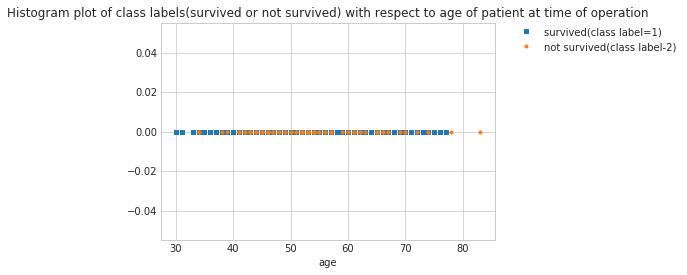

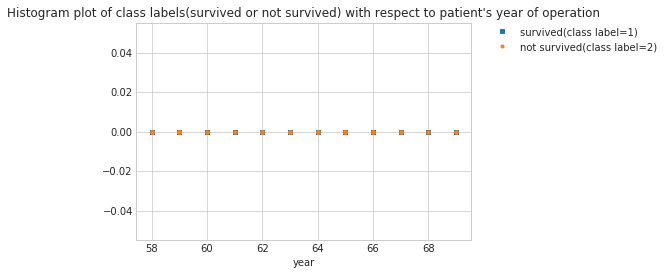

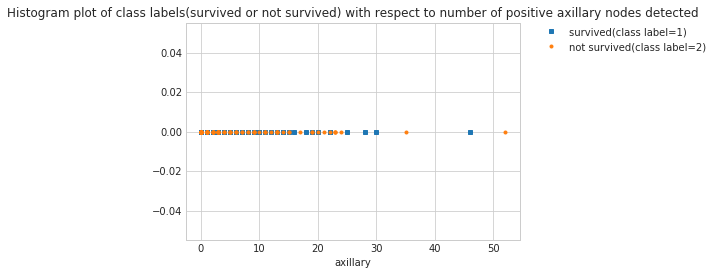

In [207]:
#1-D scatter plot of age

survived = haber.loc[haber["survived"] == 1]
not_survived = haber.loc[haber["survived"] ==2]

plt.plot(survived['age'], np.zeros_like(survived['age']),'s',  markersize=4, label="survived(class label=1)")
plt.plot(not_survived['age'], np.zeros_like(not_survived['age']),'o', markersize=3, label="not survived(class label-2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('age')
plt.title('Histogram plot of class labels(survived or not survived) with respect to age of patient at time of operation')
plt.show()

plt.plot(survived['year'], np.zeros_like(survived['year']),'s',markersize=4,label="survived(class label=1)")
plt.plot(not_survived['year'], np.zeros_like(not_survived['year']),'o',markersize=3, label="not survived(class label=2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('year')
plt.title("Histogram plot of class labels(survived or not survived) with respect to patient's year of operation")
plt.show()

plt.plot(survived['axillary'], np.zeros_like(survived['axillary']),'s',markersize=4,label="survived(class label=1)")
plt.plot(not_survived['axillary'], np.zeros_like(not_survived['axillary']),'o',markersize=3,label="not survived(class label=2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('axillary')
plt.title('Histogram plot of class labels(survived or not survived) with respect to number of positive axillary nodes detected')
plt.show()

Observations :
    * As points of both classes are almost overlapping in all the three graphs, we can not conclude anything.
    * Here we can not talk about the density of a particular x-value.

/home/shaili/env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


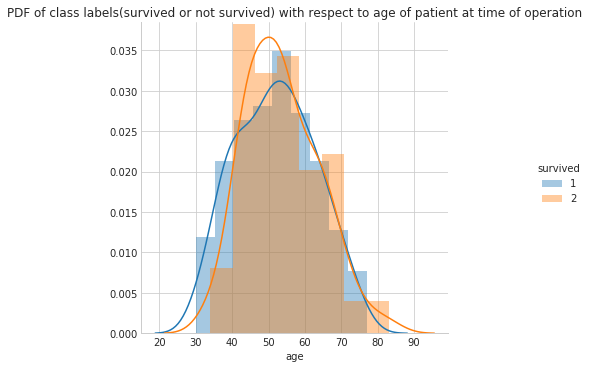

In [208]:
# visulaize data with more information
# histogram : here for given age(x axis) we also have information of number of datapoints

sns.FacetGrid(haber, hue="survived", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('PDF of class labels(survived or not survived) with respect to age of patient at time of operation');


Observation :
* The highest count of patients not surviving is between age 40 to 45.
* Here as data is overlapping and there is not much significant count difference, we can not classify data easily.


/home/shaili/env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


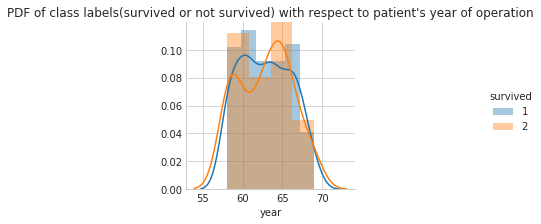

In [209]:
# visulaize data with more information
# histogram : here for given year(x axis) we also have information of number of datapoints

sns.FacetGrid(haber, hue="survived") \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("PDF of class labels(survived or not survived) with respect to patient's year of operation");

/home/shaili/env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


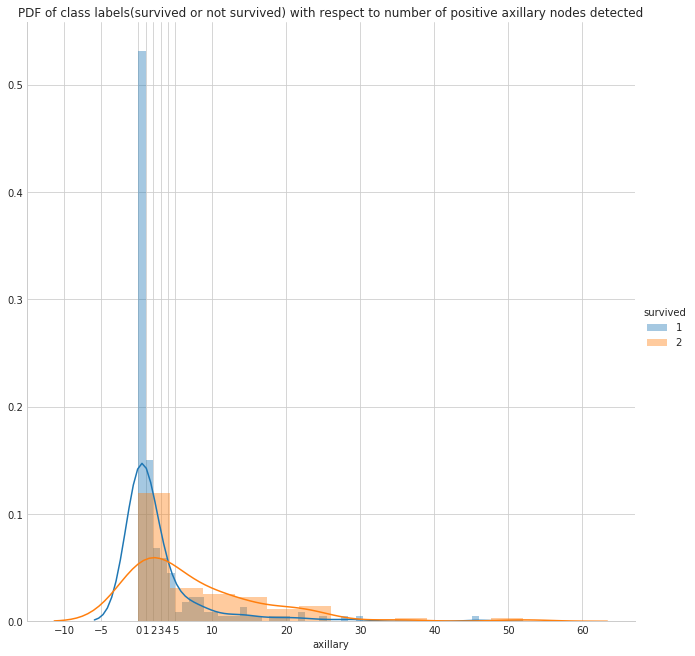

In [210]:
# visulaize data with more information
# histogram : here for given axillary(x axis) we also have information of number of datapoints

(sns.FacetGrid(haber, hue="survived", size=9)\
   .map(sns.distplot, "axillary")\
   .set(xticks=[-10,-5,0,1,2,3,4,5,10,20,30,40,50,60])\
 .add_legend());
plt.title("PDF of class labels(survived or not survived) with respect to number of positive axillary nodes detected");

Observation :

* The highest count of patients not surviving is nearby year 65.
* Here we can say that if number of positive axillary nodes detected are between 0 to 2 then there is a higher chancce of survival.
* Count of number of patients survived with number of positive axillary nodes detected less than 1 are higher than number of patients not survived.
* But if number of positive auxillary nodes detected is greater than 2, then the count of number of patients not survived is greater than survived. So the probability of not-surviving is higher. But still it is not significantly higher than the other. So we can not neglect the other class and classify the data.
* Here by looking at the plot, we can not easily classify data as data is overlapping.
* By looking at all three features axillary is better than age and year for separating classes.

[0.03111111 0.04       0.08888889 0.07555556 0.07555556 0.06666667
 0.09777778 0.14222222 0.08888889 0.07555556 0.07111111 0.05777778
 0.04444444 0.02666667 0.01777778]
[0.03111111 0.07111111 0.16       0.23555556 0.31111111 0.37777778
 0.47555556 0.61777778 0.70666667 0.78222222 0.85333333 0.91111111
 0.95555556 0.98222222 1.        ]
[30.         33.13333333 36.26666667 39.4        42.53333333 45.66666667
 48.8        51.93333333 55.06666667 58.2        61.33333333 64.46666667
 67.6        70.73333333 73.86666667 77.        ]
[0.02469136 0.02469136 0.11111111 0.16049383 0.08641975 0.14814815
 0.09876543 0.07407407 0.08641975 0.07407407 0.03703704 0.03703704
 0.01234568 0.01234568 0.01234568]
[0.02469136 0.04938272 0.16049383 0.32098765 0.40740741 0.55555556
 0.65432099 0.72839506 0.81481481 0.88888889 0.92592593 0.96296296
 0.97530864 0.98765432 1.        ]
[34.         37.26666667 40.53333333 43.8        47.06666667 50.33333333
 53.6        56.86666667 60.13333333 63.4        66.666

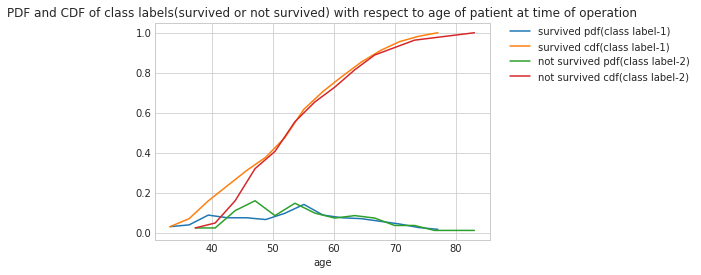

In [211]:
# Plots of CDF of age

# Misclassification error if we use age only.

# survived
counts, bin_edges = np.histogram(survived['age'], bins=15, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf);
print(cdf);
print(bin_edges);
plt.plot(bin_edges[1:],pdf,label='survived pdf(class label-1)')
plt.plot(bin_edges[1:], cdf,label='survived cdf(class label-1)')


# not survived
counts, bin_edges = np.histogram(not_survived['age'], bins=15, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf);
print(cdf);
print(bin_edges);
plt.xlabel('age')
plt.plot(bin_edges[1:],pdf,label='not survived pdf(class label-2)')
plt.plot(bin_edges[1:], cdf,label='not survived cdf(class label-2)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('PDF and CDF of class labels(survived or not survived) with respect to age of patient at time of operation');

### Observations:
* Here we can see that both orange and red lines which are cdf of classes are growing almost with the same rate, so it is hard to say based on patient's age that whether patient will survive or not. 

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


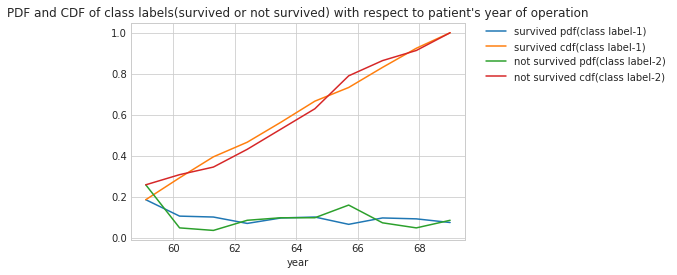

In [212]:
# Plots of CDF of year

# Misclassification error if we use age only.

# survived
counts, bin_edges = np.histogram(survived['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf);
print(cdf);
print(bin_edges);
plt.plot(bin_edges[1:],pdf,label='survived pdf(class label-1)')
plt.plot(bin_edges[1:], cdf, label='survived cdf(class label-1)')


# not survived
counts, bin_edges = np.histogram(not_survived['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf);
print(cdf);
print(bin_edges);
plt.plot(bin_edges[1:],pdf,label='not survived pdf(class label-2)')
plt.plot(bin_edges[1:], cdf,label='not survived cdf(class label-2)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('year')
plt.title("PDF and CDF of class labels(survived or not survived) with respect to patient's year of operation");


### Observations:
* Here we can see that both orange and red lines which are cdf of classes are growing almost with the same rate linearly, so it is hard to say based on year that whether patient will survive or not. 

[0.79111111 0.07111111 0.05333333 0.01777778 0.02222222 0.00888889
 0.00888889 0.00888889 0.00444444 0.00888889 0.         0.
 0.         0.         0.00444444]
[0.79111111 0.86222222 0.91555556 0.93333333 0.95555556 0.96444444
 0.97333333 0.98222222 0.98666667 0.99555556 0.99555556 0.99555556
 0.99555556 0.99555556 1.        ]
[ 0.          3.06666667  6.13333333  9.2        12.26666667 15.33333333
 18.4        21.46666667 24.53333333 27.6        30.66666667 33.73333333
 36.8        39.86666667 42.93333333 46.        ]
[0.48148148 0.12345679 0.11111111 0.09876543 0.04938272 0.03703704
 0.07407407 0.         0.         0.         0.01234568 0.
 0.         0.         0.01234568]
[0.48148148 0.60493827 0.71604938 0.81481481 0.86419753 0.90123457
 0.97530864 0.97530864 0.97530864 0.97530864 0.98765432 0.98765432
 0.98765432 0.98765432 1.        ]
[ 0.          3.46666667  6.93333333 10.4        13.86666667 17.33333333
 20.8        24.26666667 27.73333333 31.2        34.66666667 38.1333333

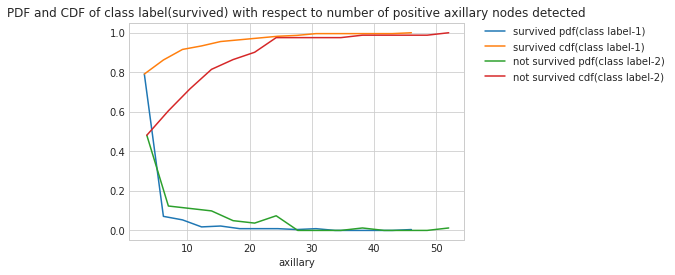

In [213]:
# Plots of CDF of axillary

# Misclassification error if we use age only.

# survived
counts, bin_edges = np.histogram(survived['axillary'], bins=15, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf);
print(cdf);
print(bin_edges);
plt.plot(bin_edges[1:],pdf,label='survived pdf(class label-1)')
plt.plot(bin_edges[1:],cdf,label='survived cdf(class label-1)')


# not survived
counts, bin_edges = np.histogram(not_survived['axillary'], bins=15, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf);
print(cdf);
print(bin_edges);
plt.plot(bin_edges[1:],pdf,label='not survived pdf(class label-2)')
plt.plot(bin_edges[1:],cdf,label='not survived cdf(class label-2)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('axillary')

plt.title("PDF and CDF of class label(survived) with respect to number of positive axillary nodes detected");

### Observations:
* We can see from values and orange plot that out of all survived people around 91% people had number of positive axillary nodes less than 6. 
* However we can see from the red line that out of all not survived people around 71.5% people had number of positive axillary nodes less than 6. 
* 71% is not a small population size. So it is hard to conclude based on number of detected axillary nodes that the patient will survive or not because within 0 to 6 number almost more than 70% population is covered in survived as well as not survived class. 
* Still we can only say that if number of positive axillary nodes is in between 0 to 6 the chances of getting survived is higher than not survived.

# (1.4) Box plot and Violin plot

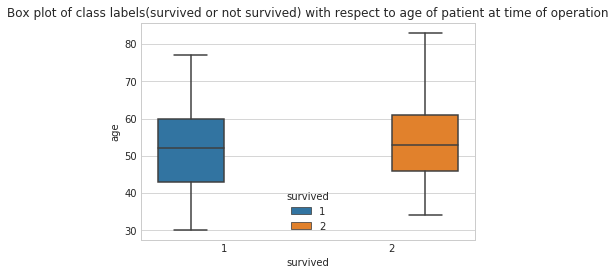

In [214]:
# box plot 
sns.boxplot(x='survived',y='age', data=haber,hue='survived');
plt.title('Box plot of class labels(survived or not survived) with respect to age of patient at time of operation');

### Observations:
* Almost both box plots are same especially 50th percentile value, so it is hard to classify data based on age accurately.

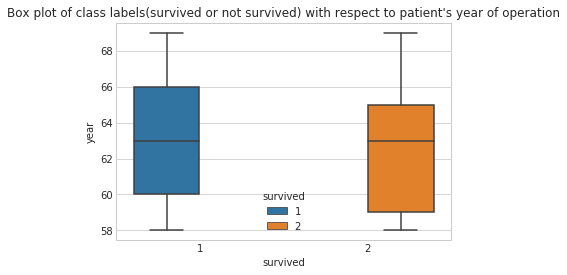

In [215]:
# box plot 
sns.boxplot(x='survived',y='year', data=haber,hue='survived')
plt.title("Box plot of class labels(survived or not survived) with respect to patient's year of operation");

### Observations:
* Almost both box plots are same especially 50th percentile value, so it is hard to classify data based on year accurately.

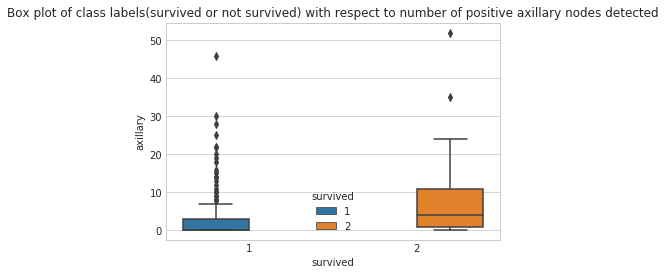

In [216]:
# box plot 
sns.boxplot(x='survived',y='axillary', data=haber,hue='survived')
plt.title("Box plot of class labels(survived or not survived) with respect to number of positive axillary nodes detected");

### Observations:
* From blue plot we can say that if number of positive axillary nodes detected is greater than 8, then it is very rare that person will survive. 
* So I put threshold that if number of positive axillary nodes detected is greater than or equal to 8 then a patient will not survive with almost 0% error.
* Almost 75 percentile of survived patients axillary node value is less than 4. So instead of putting 8 as a threshold if I say if number of positive axillary nodes detected is greater than or equal to  then a patient will not survive will result 25% of error. So almost 25% of survived people will be classified into not survived which is as per the domain very sensitive error.
* There are few cases that person survived even though the nodes are between 4 to 8.
* From orange plot we can see that 50th percentile value is around 4. So if I put condition that if number of positive axillary nodes detected is less then 4 then patient will survive then it will result that almost 50% of not survived patients will be classified into survive which is certainly very poor output. 
* In orange plot, 25 percentile value is around 1, So if I say that if number of positive axillary nodes detected is 0 or 1 then patient will survive will result to may be 25% error in not survived class which is slightly better then the previous threshold. But as this domain is very sensitive, arround 25% miss-classified points for not survived class is not acceptable. As it is very wrong to classify not survived people into survived.
* Therefore it hard to classify patients with acceptable accuracy if they have number of positive axillary nodes detected in between 0 and 8.

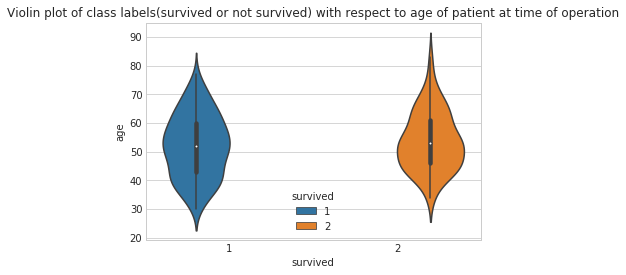

In [217]:
#  violin plot

sns.violinplot(x="survived", y="age", data=haber, size=8,hue='survived')
plt.title('Violin plot of class labels(survived or not survived) with respect to age of patient at time of operation');

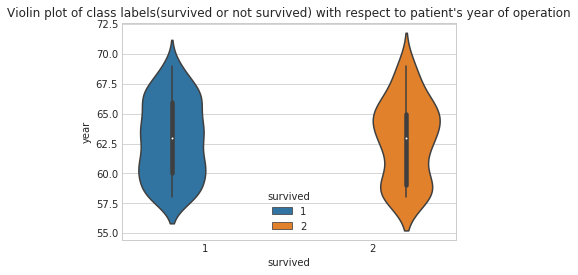

In [218]:
#  violin plot

sns.violinplot(x="survived", y="year", data=haber, size=8,hue='survived')
plt.title("Violin plot of class labels(survived or not survived) with respect to patient's year of operation");

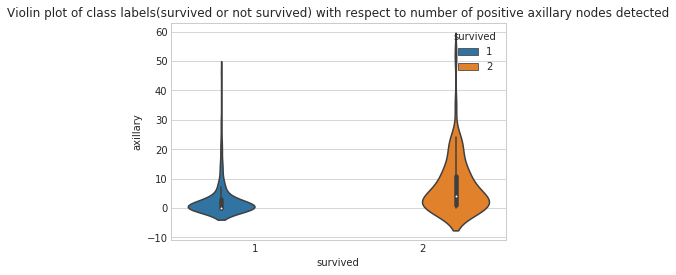

In [219]:
#  violin plot

sns.violinplot(x="survived", y="axillary", data=haber, size=8,hue='survived')
plt.title("Violin plot of class labels(survived or not survived) with respect to number of positive axillary nodes detected");

### Observations:
As we know violin plot is combined representation of box plot and pdf, we can see the same observations of pdf plot and box plot here as well.

# (1.5) Bi-variate analysis:

### Pair plot

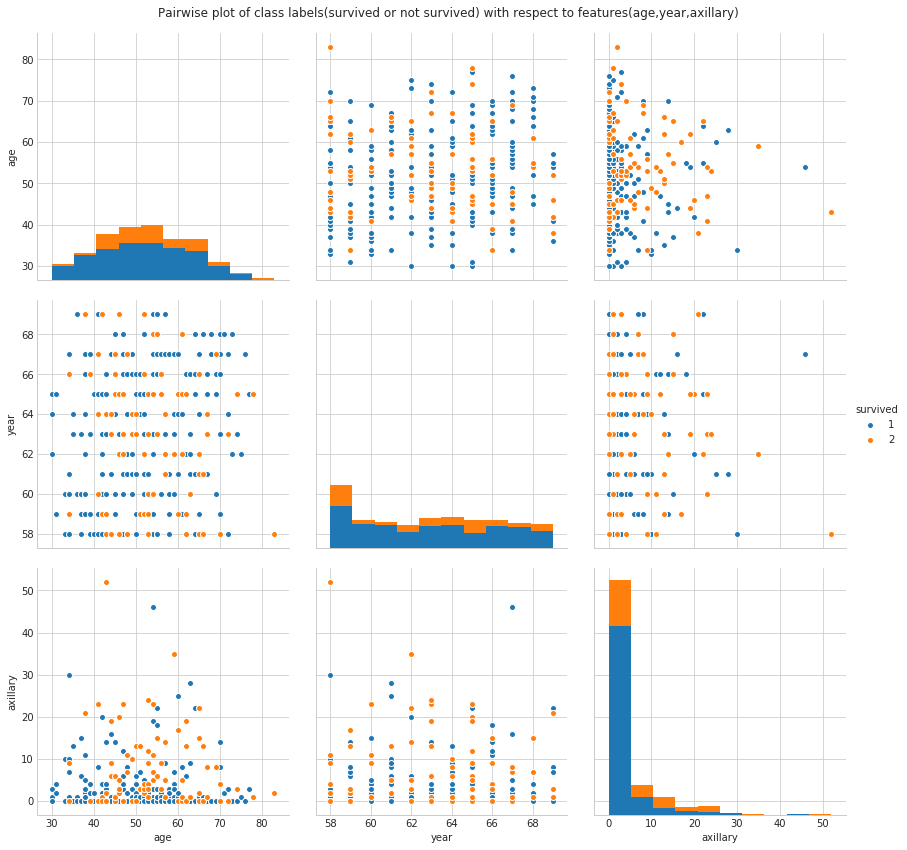

In [220]:
# pairwise scatter plot: Pair-Plot

sns.set_style("whitegrid");
g = sns.pairplot(haber, x_vars=['age', 'year', 'axillary'], y_vars=['age', 'year', 'axillary'],hue="survived", size=4);
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Pairwise plot of class labels(survived or not survived) with respect to features(age,year,axillary)")
plt.show();

### Observations :
* It is much harder to separate both classes using pair plot as they have considerable overlap. Here we can not make much sense out of it.

### Conclusions :
* As per our observations number of positive axillary nodes detected is the most useful feature to classify the patient will survive or not.
* We can not find or put "if-else" condition to build accurate model. However just to design simple model we can put if-else condition with arround error rate of 25%-50% in each class.
* We may need to add some more new features or use some feature engineering technique to classify accurately.